In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [22]:
data =  pd.read_csv(r"C:\Users\user\Downloads\titanic data sets.csv")

In [23]:
data

PassengerId  Survived  Pclass  \
0               1       0.0       3   
1               2       1.0       1   
2               3       1.0       3   
3               4       1.0       1   
4               5       0.0       3   
...           ...       ...     ...   
1304         1305       NaN       3   
1305         1306       NaN       1   
1306         1307       NaN       3   
1307         1308       NaN       3   
1308         1309       NaN       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                 ...     ...   ...    ...   
1304                                 Spector, Mr. Woolf    male   NaN      0   
1305                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
1306                       Saether, Mr. Simon Sivertsen    male  38.5      0   
1307                                Ware, Mr. Frederick    male   NaN      0   
1308                           Peter, Master. Michael J    male   NaN      1   

      Parch              Ticket      Fare  ... Embarked  WikiId  \
0         0           A/5 21171    7.2500  ...        S   691.0   
1         0            PC 17599   71.2833  ...        C    90.0   
2         0    STON/O2. 3101282    7.9250  ...        S   865.0   
3         0              113803   53.1000  ...        S   127.0   
4         0              373450    8.0500  ...        S   627.0   
...     ...                 ...       ...  ...      ...     ...   
1304      0           A.5. 3236    8.0500  ...        S  1227.0   
1305      0            PC 17758  108.9000  ...        C   229.0   
1306      0  SOTON/O.Q. 3101262    7.2500  ...        S  1169.0   
1307      0              359309    8.0500  ...        S  1289.0   
1308      1                2668   22.3583  ...        C   702.0   

                                       Name_wiki Age_wiki  \
0                        Braund, Mr. Owen Harris     22.0   
1     Cumings, Mrs. Florence Briggs (née Thayer)     35.0   
2                          Heikkinen, Miss Laina     26.0   
3             Futrelle, Mrs. Lily May (née Peel)     35.0   
4                       Allen, Mr. William Henry     35.0   
...                                          ...      ...   
1304                          Spector, Mr. Woolf     23.0   
1305        and maid, Doña Fermina Oliva y Ocana     39.0   
1306                 Sæther, Mr. Simon Sivertsen     43.0   
1307                 Ware, Mr. Frederick William     34.0   
1308             Butrus-Youssef, Master Makhkhul      4.0   

                                Hometown      Boarded  \
0             Bridgerule, Devon, England  Southampton   
1                 New York, New York, US    Cherbourg   
2                     Jyväskylä, Finland  Southampton   
3            Scituate, Massachusetts, US  Southampton   
4     Birmingham, West Midlands, England  Southampton   
...                                  ...          ...   
1304                     London, England  Southampton   
1305                       Madrid, Spain    Cherbourg   
1306        Skaun, Sør-Trøndelag, Norway  Southampton   
1307          Greenwich, London, England  Southampton   
1308                   Sar'al[81], Syria    Cherbourg   

                                  Destination Lifeboat  Body Class  
0     Qu'Appelle Valley, Saskatchewan, Canada      NaN   NaN   3.0  
1                      New York, New York, US        4   NaN   1.0  
2                               New York City      14?   NaN   3.0  
3                 Scituate, Massachusetts, US        D   NaN   1.0  
4       

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  WikiId       1304 non-null   float64
 13  Name_wiki    1304 non-null   object 
 14  Age_wiki     1302 non-null   float64
 15  Hometown     1304 non-null   object 
 16  Boarded      1304 non-null   object 
 17  Destination  1304 non-null   object 
 18  Lifeboat     502 non-null    object 
 19  Body  

In [25]:
data.shape

(1309, 21)

In [26]:
data.duplicated().any()

False

In [28]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'WikiId', 'Name_wiki',
       'Age_wiki', 'Hometown', 'Boarded', 'Destination', 'Lifeboat', 'Body',
       'Class'],
      dtype='object')

In [29]:
le = LabelEncoder()
data_encoded = data.apply(le.fit_transform)

In [30]:
data_encoded

PassengerId  Survived  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  \
0               0         0       2   155    1   32      1      0     720   
1               1         1       0   286    0   57      1      0     816   
2               2         1       2   523    0   39      0      0     914   
3               3         1       0   422    0   53      1      0      65   
4               4         0       2    22    1   53      0      0     649   
...           ...       ...     ...   ...  ...  ...    ...    ...     ...   
1304         1304         2       2  1126    1   98      0      0     711   
1305         1305         2       0   891    0   59      0      0     834   
1306         1306         2       2  1046    1   58      0      0     872   
1307         1307         2       2  1227    1   98      0      0     579   
1308         1308         2       2   953    1   98      1      1     262   

      Fare  ...  Embarked  WikiId  Name_wiki  Age_wiki  Hometown  Boarded  \
0       20  ...         2     681        141        28        67        3   
1      237  ...         0      89        267        41       355        1   
2       50  ...         2     855        487        32       257        3   
3      217  ...         2     126        394        41       431        3   
4       52  ...         2     617         23        41        51        3   
...    ...  ...       ...     ...        ...       ...       ...      ...   
1304    52  ...         2    1216       1075        29       310        3   
1305   261  ...         0     228       1254        45       319        1   
1306    20  ...         2    1158       1113        49       442        3   
1307    52  ...         2    1278       1179        40       193        3   
1308   146  ...         0     692        164        10       428        1   

      Destination  Lifeboat  Body  Class  
0             215        24   130      2  
1             185        12   130      0  
2             184         6   130      2  
3             239        23   130      0  
4             184        24   130      2  
...           ...       ...   ...    ...  
1304          184        24   130      2  
1305          185        16   130      0  
1306          274        24    93      2  
1307          184        24   130      2  
1308           69        23   130      2  

[1309 rows x 21 columns]

<Axes: >

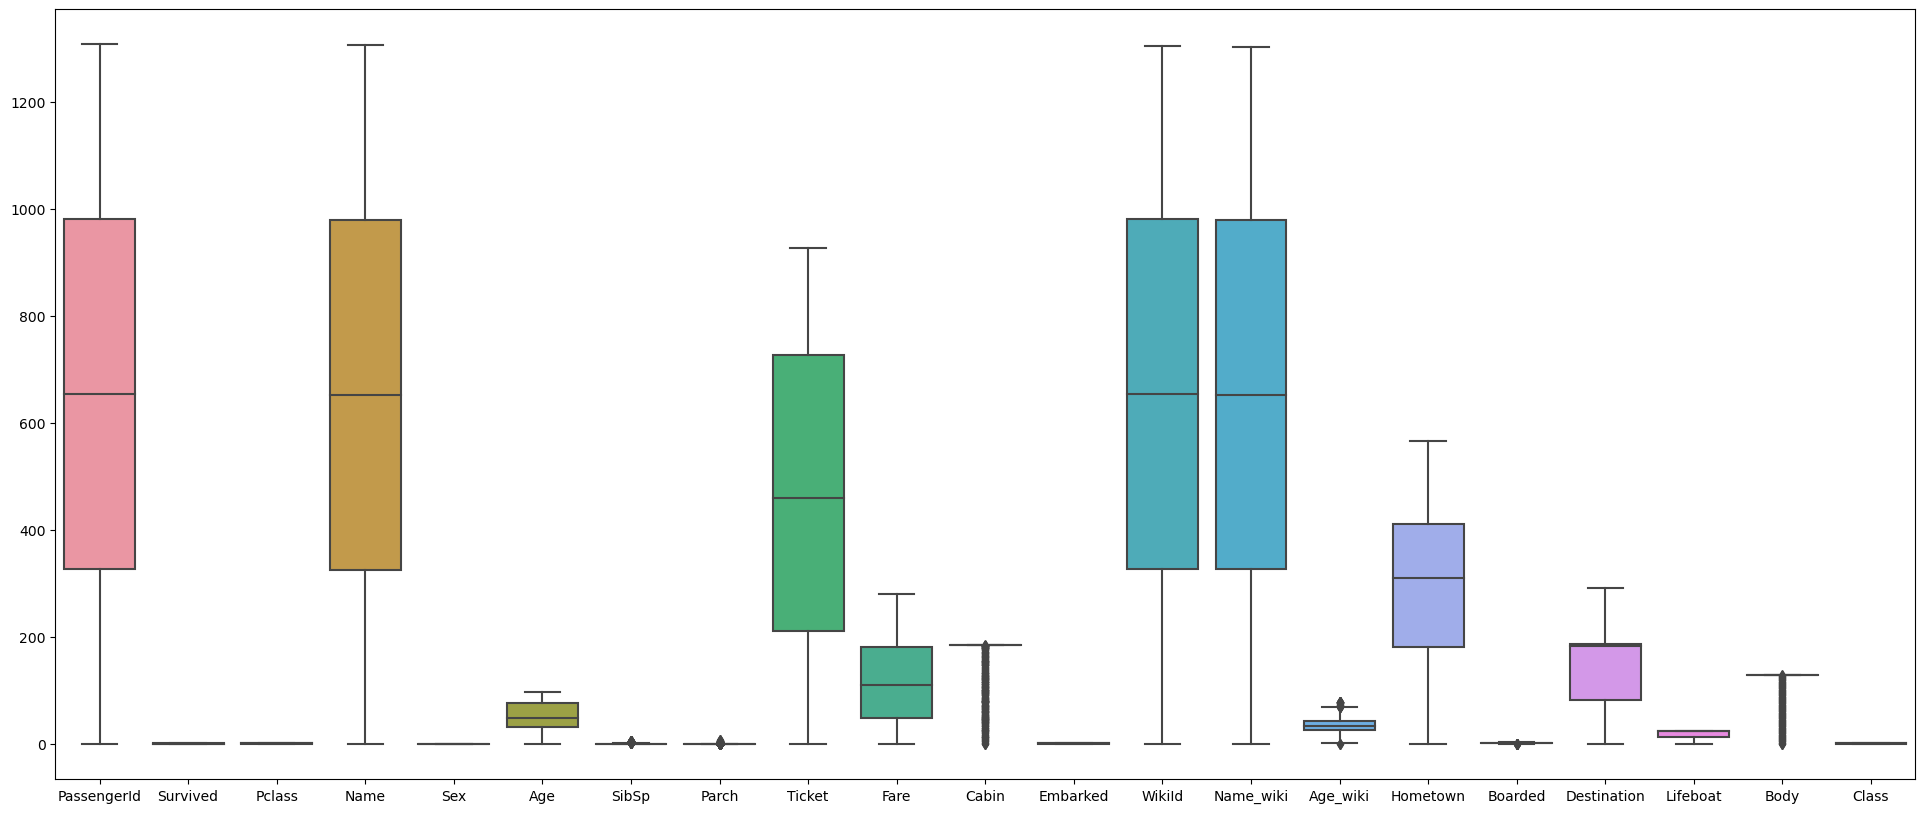

In [33]:
plt.figure(figsize = (24,10))
sn.boxplot(data_encoded)

<Axes: >

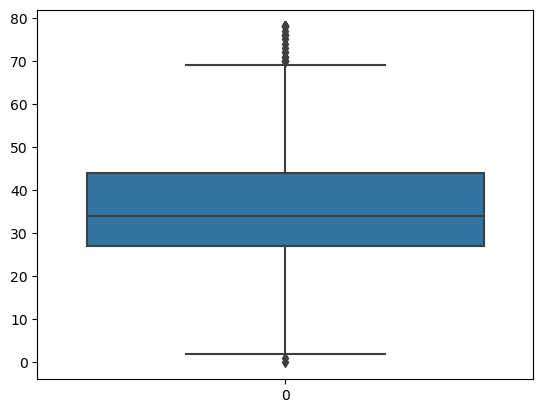

In [35]:
sn.boxplot(data_encoded['Age_wiki'])

In [37]:
upper_limit = data_encoded['Age_wiki'].mean()+3*data_encoded['Age_wiki'].std()
lower_limit = data_encoded['Age_wiki'].mean()-3*data_encoded['Age_wiki'].std()

In [38]:
print('upper_limit',upper_limit)
print('lower_limit',lower_limit)

upper_limit 77.92701950323097
lower_limit -6.700128746928442


In [40]:
data_clean = data_encoded.loc[(data_encoded['Age_wiki']<upper_limit)&(data_encoded['Age_wiki']>lower_limit)]

In [41]:
data_clean

PassengerId  Survived  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  \
0               0         0       2   155    1   32      1      0     720   
1               1         1       0   286    0   57      1      0     816   
2               2         1       2   523    0   39      0      0     914   
3               3         1       0   422    0   53      1      0      65   
4               4         0       2    22    1   53      0      0     649   
...           ...       ...     ...   ...  ...  ...    ...    ...     ...   
1304         1304         2       2  1126    1   98      0      0     711   
1305         1305         2       0   891    0   59      0      0     834   
1306         1306         2       2  1046    1   58      0      0     872   
1307         1307         2       2  1227    1   98      0      0     579   
1308         1308         2       2   953    1   98      1      1     262   

      Fare  ...  Embarked  WikiId  Name_wiki  Age_wiki  Hometown  Boarded  \
0       20  ...         2     681        141        28        67        3   
1      237  ...         0      89        267        41       355        1   
2       50  ...         2     855        487        32       257        3   
3      217  ...         2     126        394        41       431        3   
4       52  ...         2     617         23        41        51        3   
...    ...  ...       ...     ...        ...       ...       ...      ...   
1304    52  ...         2    1216       1075        29       310        3   
1305   261  ...         0     228       1254        45       319        1   
1306    20  ...         2    1158       1113        49       442        3   
1307    52  ...         2    1278       1179        40       193        3   
1308   146  ...         0     692        164        10       428        1   

      Destination  Lifeboat  Body  Class  
0             215        24   130      2  
1             185        12   130      0  
2             184         6   130      2  
3             239        23   130      0  
4             184        24   130      2  
...           ...       ...   ...    ...  
1304          184        24   130      2  
1305          185        16   130      0  
1306          274        24    93      2  
1307          184        24   130      2  
1308           69        23   130      2  

[1302 rows x 21 columns]

In [42]:
data_clean.describe()

PassengerId     Survived       Pclass         Name          Sex  \
count  1302.000000  1302.000000  1302.000000  1302.000000  1302.000000   
mean    653.919355     0.899386     1.294163   653.223502     0.644393   
std     377.850084     0.853541     0.837411   377.850974     0.478881   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%     326.250000     0.000000     1.000000   325.250000     0.000000   
50%     654.500000     1.000000     2.000000   652.500000     1.000000   
75%     979.750000     2.000000     2.000000   979.750000     1.000000   
max    1308.000000     2.000000     2.000000  1306.000000     1.000000   

               Age        SibSp        Parch       Ticket         Fare  ...  \
count  1302.000000  1302.000000  1302.000000  1302.000000  1302.000000  ...   
mean     54.979263     0.486943     0.381720   463.514593   122.382488  ...   
std      27.801819     0.953685     0.838763   278.297447    79.928309  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%      32.000000     0.000000     0.000000   211.250000    49.000000  ...   
50%      48.000000     0.000000     0.000000   459.000000   111.000000  ...   
75%      76.750000     1.000000     0.000000   727.750000   181.000000  ...   
max      98.000000     6.000000     7.000000   928.000000   281.000000  ...   

          Embarked       WikiId    Name_wiki     Age_wiki     Hometown  \
count  1302.000000  1302.000000  1302.000000  1302.000000  1302.000000   
mean      1.500000   651.157450   651.171275    35.385561   298.347158   
std       0.812801   376.756715   376.372437    13.794541   156.107679   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000   325.250000   325.250000    27.000000   179.250000   
50%       2.000000   650.500000   651.500000    34.000000   311.000000   
75%       2.000000   977.750000   976.750000    43.750000   410.000000   
max       3.000000  1303.000000  1302.000000    77.000000   565.000000   

           Boarded  Destination     Lifeboat         Body        Class  
count  1302.000000  1302.000000  1302.000000  1302.000000  1302.000000  
mean      2.490783   154.880952    18.997696   123.460061     1.290323  
std       0.831448    75.121314     7.580619    22.947948     0.841039  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       2.000000    83.000000    14.000000   130.000000     0.250000  
50%       3.000000   184.000000    24.000000   130.000000     2.000000  
75%       3.000000   187.000000    24.000000   130.000000     2.000000  
max       3.000000   290.000000    24.000000   130.000000     2.000000  

[8 rows x 21 columns]

<Axes: >

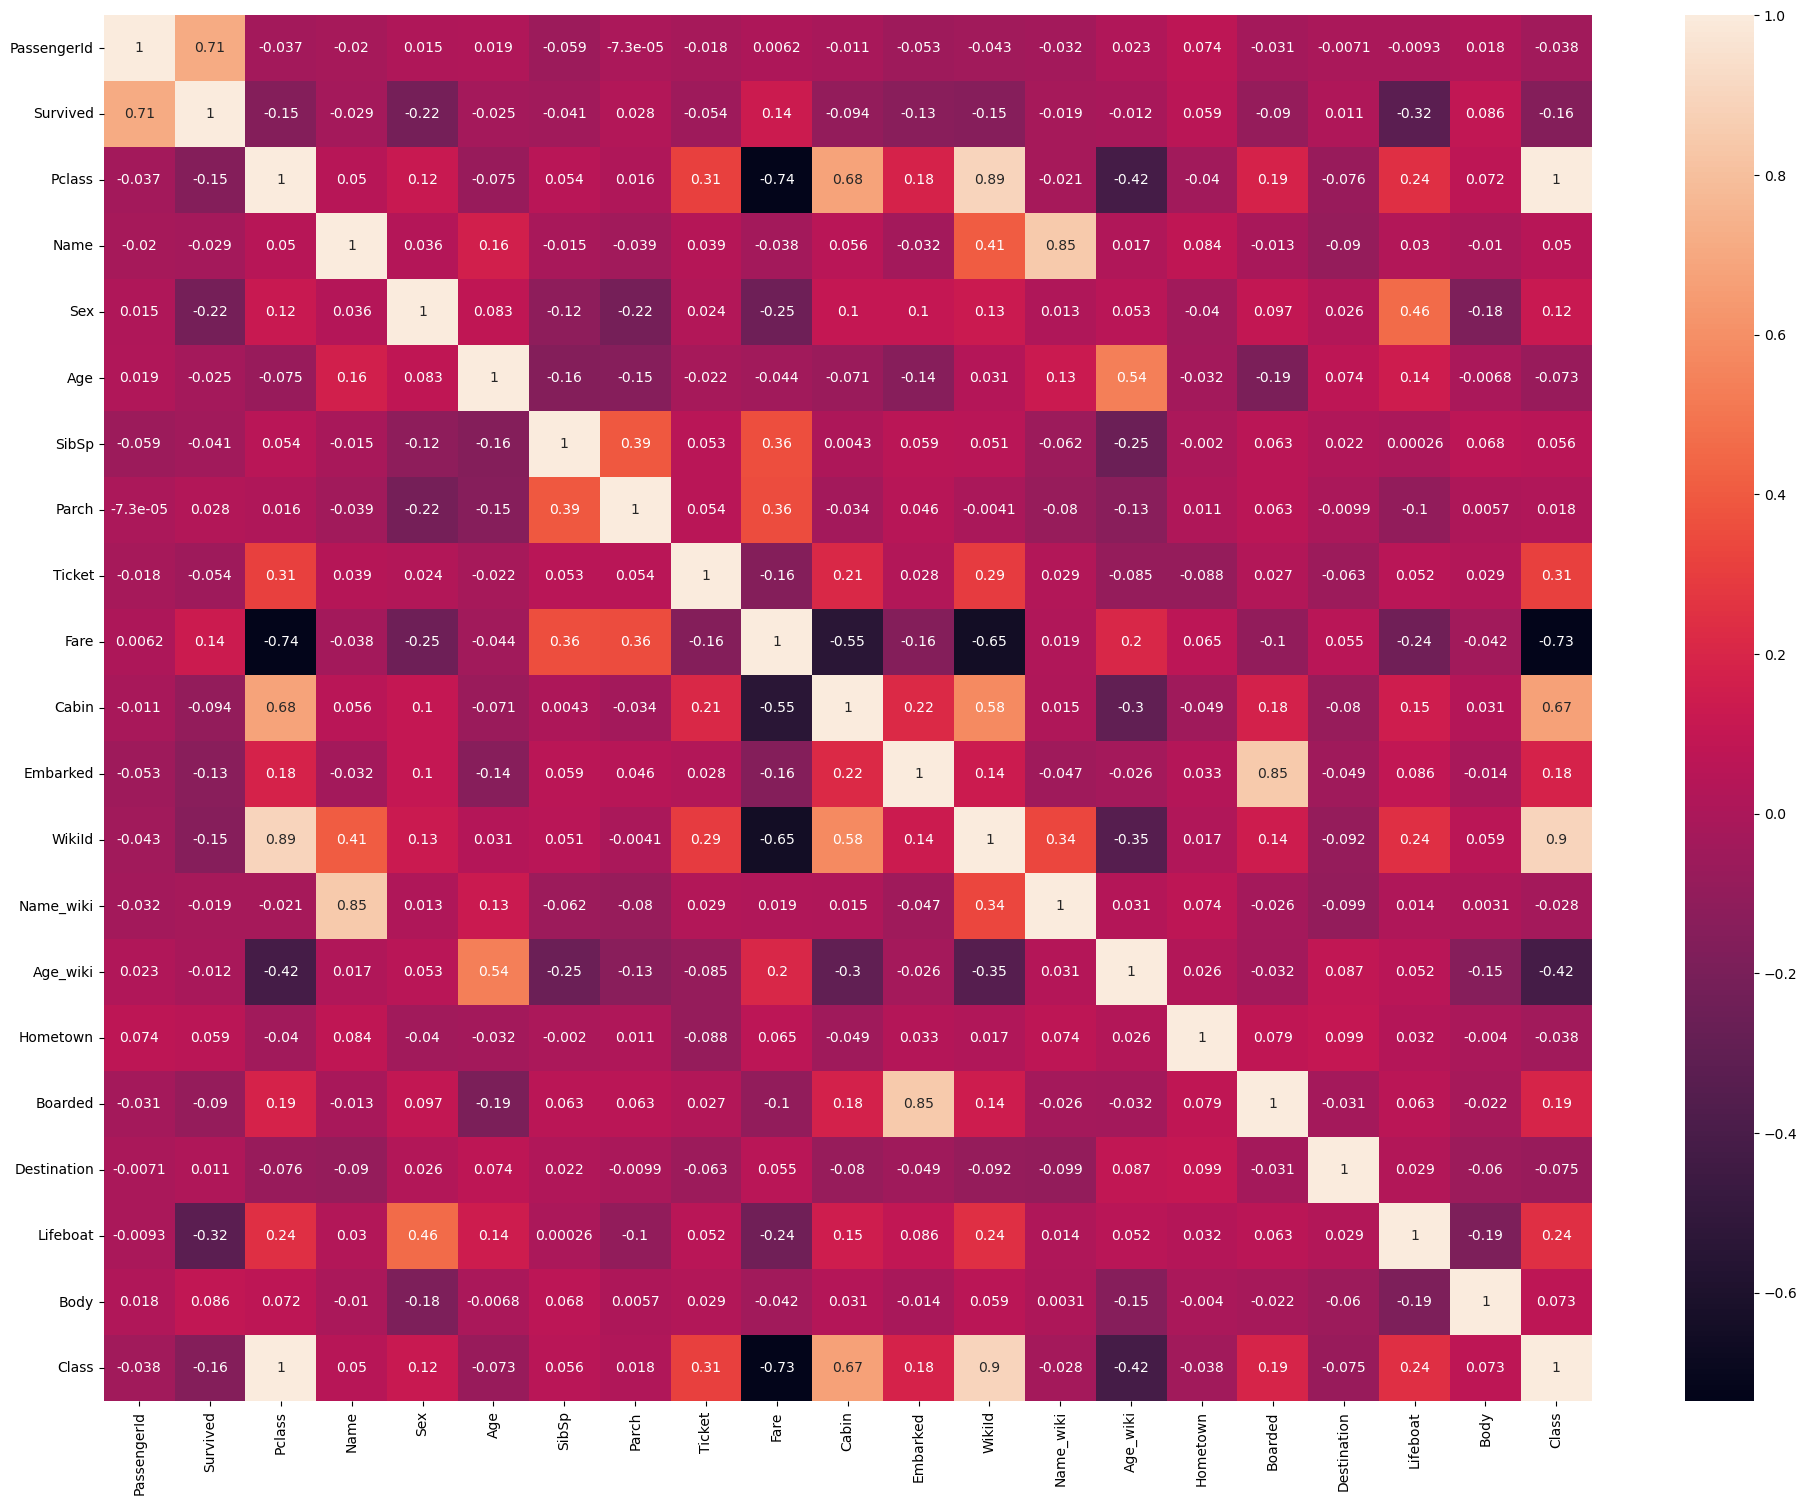

In [44]:
plt.figure(figsize = (24,18))
sn.heatmap(data_clean.corr(), annot = True)

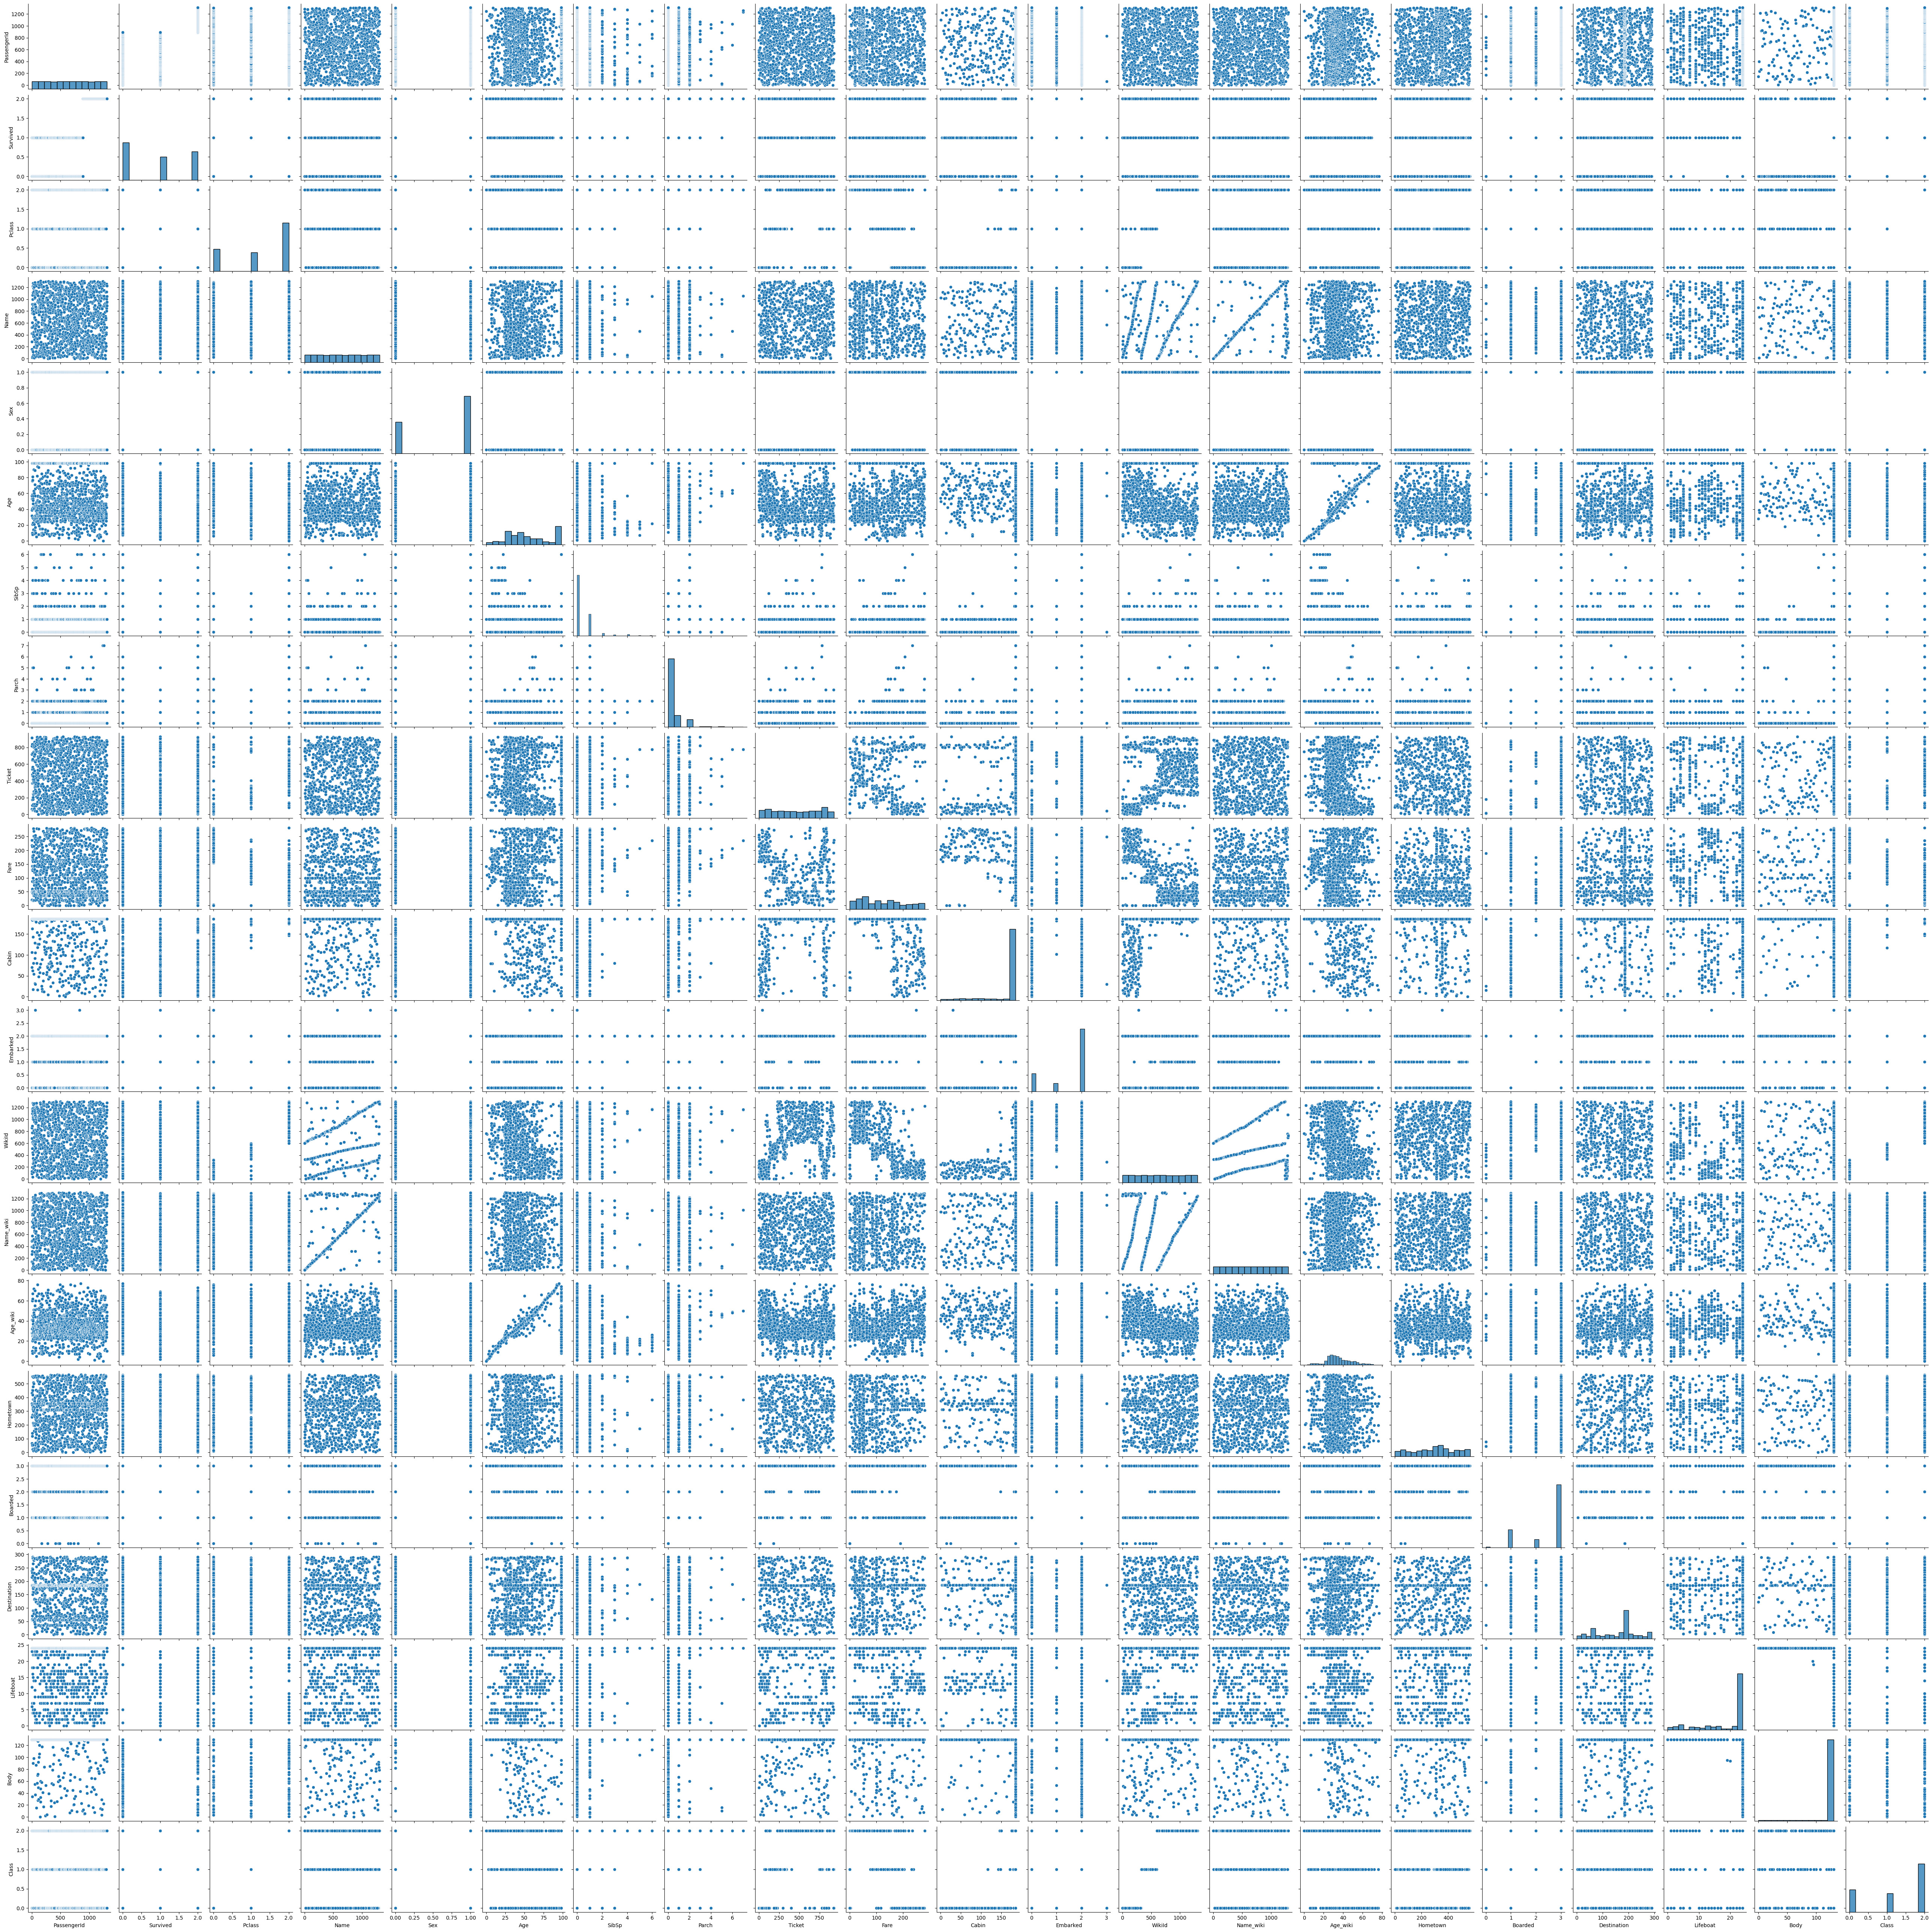

In [45]:
sn.pairplot(data_clean)

In [46]:
data_clean.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'WikiId', 'Name_wiki',
       'Age_wiki', 'Hometown', 'Boarded', 'Destination', 'Lifeboat', 'Body',
       'Class'],
      dtype='object')

In [47]:
x = data_clean.drop(['Survived'] , axis =1)
y = data_clean['Survived']

In [48]:
x.head()

PassengerId  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  Fare  Cabin  \
0            0       2   155    1   32      1      0     720    20    186   
1            1       0   286    0   57      1      0     816   237    106   
2            2       2   523    0   39      0      0     914    50    186   
3            3       0   422    0   53      1      0      65   217     70   
4            4       2    22    1   53      0      0     649    52    186   

   Embarked  WikiId  Name_wiki  Age_wiki  Hometown  Boarded  Destination  \
0         2     681        141        28        67        3          215   
1         0      89        267        41       355        1          185   
2         2     855        487        32       257        3          184   
3         2     126        394        41       431        3          239   
4         2     617         23        41        51        3          184   

   Lifeboat  Body  Class  
0        24   130      2  
1        12   130      0  
2         6   130      2  
3        23   130      0  
4        24   130      2

In [49]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [50]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.20 , random_state = 42)

In [51]:
x_train.shape , x_test.shape

((1041, 20), (261, 20))

In [52]:
model = LogisticRegression()

In [53]:
model.fit(x_train , y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
y_pred = model.predict(x_test)

In [55]:
y_pred

array([0, 0, 0, 1, 2, 0, 1, 1, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2,
       2, 2, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 1, 1,
       2, 0, 1, 2, 0, 0, 2, 2, 0, 0, 2, 1, 1, 1, 0, 2, 1, 1, 1, 0, 0, 2,
       0, 0, 0, 2, 2, 0, 1, 0, 2, 2, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 1, 2,
       2, 0, 1, 2, 0, 1, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 2, 2, 0, 0,
       0, 2, 0, 2, 1, 0, 1, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 1, 0, 0, 2,
       0, 0, 2, 1, 0, 2, 0, 0, 1, 1, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0,
       2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 0, 0, 1, 2,
       0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 1, 0, 2, 0, 1, 0, 2, 1, 1, 2, 1,
       2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 1,
       0, 2, 2, 2, 0, 1, 2, 1, 2, 1, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 2, 1, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 0, 2, 1],
      dtype=int64)

In [58]:
from sklearn.metrics import accuracy_score , classification_report , roc_curve , roc_auc_score 

In [59]:
accuracy_result = accuracy_score(y_test , y_pred)

In [60]:
accuracy_result

0.9157088122605364

In [61]:
classification_result = classification_report(y_test , y_pred)

In [63]:
print(classification_result)

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       117
           1       0.95      0.83      0.88        64
           2       0.93      0.97      0.95        80

    accuracy                           0.92       261
   macro avg       0.92      0.91      0.91       261
weighted avg       0.92      0.92      0.92       261



In [67]:
model_clf = RandomForestClassifier(n_estimators = 100 , max_features = 3)

In [68]:
model_clf.fit(x_train , y_train)

RandomForestClassifier(max_features=3)

In [70]:
y_pred_clf = model_clf.predict(x_test)

In [71]:
y_pred_clf

array([0, 0, 0, 1, 2, 0, 1, 1, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 1, 2,
       2, 2, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1, 2, 2, 2, 2, 2, 0, 0, 1, 1,
       0, 0, 1, 2, 0, 0, 2, 2, 0, 0, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0, 2,
       0, 0, 0, 2, 2, 0, 1, 0, 2, 2, 1, 0, 2, 1, 0, 1, 0, 1, 0, 1, 1, 2,
       0, 0, 1, 2, 0, 1, 0, 2, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 2, 2, 0, 0,
       0, 2, 0, 2, 1, 0, 0, 2, 2, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2,
       0, 0, 2, 1, 0, 2, 0, 0, 1, 1, 0, 0, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0,
       2, 2, 2, 0, 2, 2, 2, 1, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 0, 0, 1, 2,
       0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 1, 0, 2, 0, 1, 0, 2, 1, 1, 2, 1,
       2, 0, 1, 2, 1, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 1,
       0, 2, 2, 2, 0, 1, 2, 1, 2, 1, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 2, 1, 1, 2, 1, 1, 2, 0, 2, 1, 0, 0, 0, 2, 1],
      dtype=int64)

In [72]:
accuracy_clf = accuracy_score(y_test ,y_pred_clf)

In [74]:
accuracy_clf

0.9923371647509579

In [75]:
pd.DataFrame({'Actual': y_test , 'Predicted': y_pred})

Actual  Predicted
481        0          0
728        0          0
313        0          0
855        1          1
1282       2          2
...      ...        ...
200        0          0
297        0          0
287        0          0
1001       2          2
10         1          1

[261 rows x 2 columns]

## Hyperparameter Tuning

In [76]:
from sklearn.model_selection import GridSearchCV

In [83]:
param_grid = {'n_estimators': [50,100,200],
             'max_features': [3,5]}

In [84]:
grid_search =GridSearchCV(model_clf , param_grid  , cv = 5)

In [85]:
grid_search.fit(x_train , y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_features=3),
             param_grid={'max_features': [3, 5],
                         'n_estimators': [50, 100, 200]})

In [86]:
grid_search.best_params_

{'max_features': 5, 'n_estimators': 100}

In [87]:
print('grid_search_bestparams' , grid_search.best_params_)
print('grid_search_bestscore' , grid_search.best_score_)

grid_search_bestparams {'max_features': 5, 'n_estimators': 100}
grid_search_bestscore 0.9971199852778799
